In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('facies_vectors.csv')
feature_names = ['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS']
facies_names = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS', 'WS', 'D', 'PS', 'BS']
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00', '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']
data = data.fillna(data['PE'].mean())

In [5]:
data.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


In [45]:
from matplotlib import pyplot as plt
import pylab
def Plotting (y_pred, well, data):
    Colors = ['green', 'red', 'blue', 'grey', 'black']
    y = data['Depth'].values
    index = 1
    for feature in feature_names[0:-2]:
        x = data[feature].values
        pylab.subplot(1, 7, index)
        pylab.suptitle(well)
        if index == 1:
            pylab.ylabel('Depth')
        pylab.xlabel(feature)
        pylab.plot(x, y, Colors[index-1])
        index += 1
    pylab.subplot(1, 7, index)
    x = data['Facies'].values
    for i in range(len(y)):
        pylab.xlabel('Real Facies')
        pylab.plot([0, 1], [y[i],y[i]], facies_colors[x[i] - 1])
    index += 1
    pylab.subplot(1, 7, index)
    for i in range(len(y)):
        pylab.xlabel('Predicted Facies')
        pylab.plot([0, 1], [y[i],y[i]], facies_colors[y_pred[i] - 1])
    pylab.show()

Bagging of trees

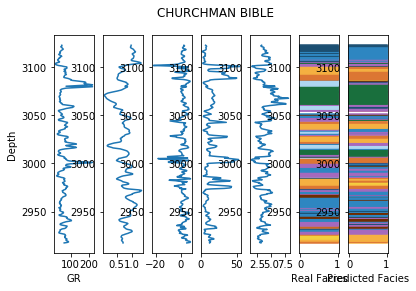

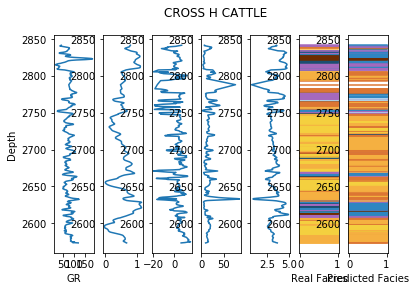

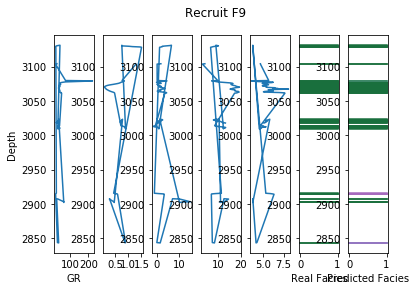

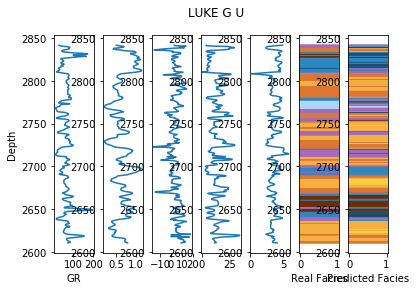

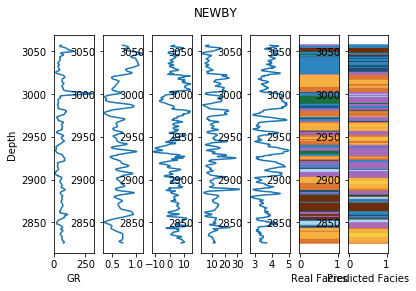

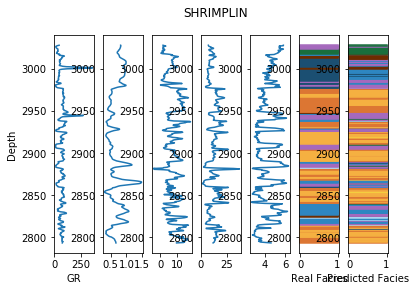

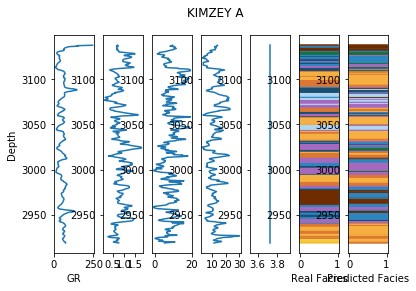

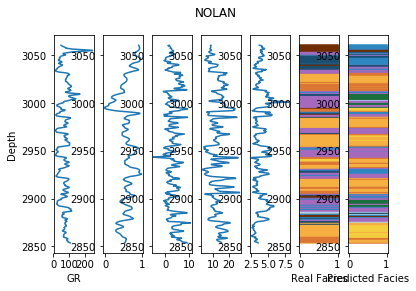

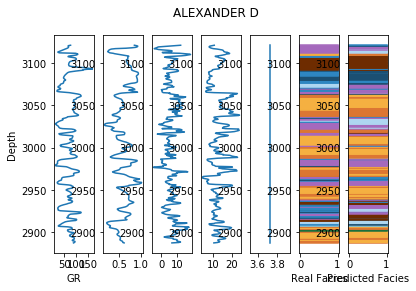

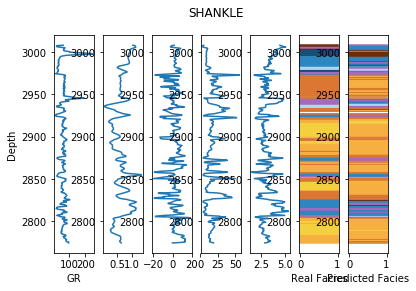

well, bagging of tree,  0.5511839347041791


In [46]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

#split data
#acc = 0
#for index in range(10):
    
 #   train, test = train_test_split(data, test_size=0.3)
 #   X_train = train[feature_names].values
 #   y_train = train['Facies'].values
 #   X_test = test[feature_names].values
 #   y_test = test['Facies'].values
    
 #   scaler = StandardScaler().fit(X_train)
 #   X_train_norm = scaler.transform(X_train)
 #   X_test_norm = scaler.transform(X_test)
    
 #   clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth= None, max_features= None, min_samples_split= 3, splitter= 'best')
 #   clf_bagging = BaggingClassifier(base_estimator=clf_tree, n_estimators=150)
 #   clf_bagging.fit(X_train_norm , y_train)
 #   y_predict = clf_bagging.predict(X_test_norm)
 #   acc += f1_score(y_test, y_predict, average='micro')
#print('split, bagging of tree, ', acc/10)

#test well
params = dict()
params['LUKE G U'] = {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_split': 2, 'splitter': 'best'} 
params['KIMZEY A'] = {'criterion': 'entropy', 'max_depth': 4, 'max_features': None, 'min_samples_split': 2, 'splitter': 'best'}
params['CROSS H CATTLE'] = {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_split': 2, 'splitter': 'best'}
params['NEWBY'] = {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_split': 4, 'splitter': 'best'}
params['SHRIMPLIN'] = {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_split': 2, 'splitter': 'best'}
params['ALEXANDER D'] = {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_split': 2, 'splitter': 'best'}
params['SHANKLE'] = {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_split': 4, 'splitter': 'best'}
params['CHURCHMAN BIBLE'] = {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_split': 2, 'splitter': 'best'}
params['Recruit F9'] = {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_split': 2, 'splitter': 'best'}
params['NOLAN'] = {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_split': 2, 'splitter': 'best'}
acc = 0
for well in set(data['Well Name']):
    train = data[data['Well Name'] != well]
    test = data[data['Well Name'] == well]
    X_train = train[feature_names].values
    y_train = train['Facies'].values
    X_test = test[feature_names].values
    y_test = test['Facies'].values
    
    scaler = StandardScaler().fit(X_train)
    X_train_norm = scaler.transform(X_train)
    X_test_norm = scaler.transform(X_test)
    
    clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth= None, max_features= None, min_samples_split= 3, splitter= 'best')
    clf_bagging = BaggingClassifier(base_estimator=clf_tree, n_estimators=150)
    clf_bagging.fit(X_train_norm , y_train)
    y_predict = clf_bagging.predict(X_test_norm)
    Plotting(y_predict, well, test)
    acc += f1_score(y_test, y_predict, average='micro')
print('well, bagging of tree, ', acc/10)

Bagging of SVMs:

In [14]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

#split data
acc = 0
for index in range(10):
    
    train, test = train_test_split(data, test_size=0.3)
    X_train = train[feature_names].values
    y_train = train['Facies'].values
    X_test = test[feature_names].values
    y_test = test['Facies'].values
    
    scaler = StandardScaler().fit(X_train)
    X_train_norm = scaler.transform(X_train)
    X_test_norm = scaler.transform(X_test)
    
    clf_svm = SVC(C=10, degree=2, kernel='rbf')
    clf_bagging = BaggingClassifier(base_estimator=clf_svm,  n_estimators=100)
    clf_bagging.fit(X_train_norm , y_train)
    y_predict = clf_bagging.predict(X_test_norm)
    acc += f1_score(y_test, y_predict, average='micro')
print('split, bagging of SVMs, ', acc/10)
#test well
acc = 0
for well in set(data['Well Name']):
    train = data[data['Well Name'] != well]
    test = data[data['Well Name'] == well]
    X_train = train[feature_names].values
    y_train = train['Facies'].values
    X_test = test[feature_names].values
    y_test = test['Facies'].values
    
    scaler = StandardScaler().fit(X_train)
    X_train_norm = scaler.transform(X_train)
    X_test_norm = scaler.transform(X_test)
    
    clf_svm = SVC(C=10, degree=2, kernel='rbf')
    clf_bagging = BaggingClassifier(base_estimator=clf_svm,  n_estimators=100)
    clf_bagging.fit(X_train_norm , y_train)
    y_predict = clf_bagging.predict(X_test_norm)
    acc += f1_score(y_test, y_predict, average='micro')
print('well, bagging of SVMs, ', acc/10)

split, bagging of SVMs,  0.660401606425703
well, bagging of SVMs,  0.5066589484876968


Boosting of trees:

In [7]:
from xgboost.sklearn import  XGBClassifier
#split data
acc = 0
for index in range(10):
    
    train, test = train_test_split(data, test_size=0.3)
    X_train = train[feature_names].values
    y_train = train['Facies'].values
    X_test = test[feature_names].values
    y_test = test['Facies'].values

    scaler = StandardScaler().fit(X_train)
    X_train_norm = scaler.transform(X_train)
    X_test_norm = scaler.transform(X_test)
    
    clf_xgb = XGBClassifier(max_depth=3, learning_rate=0.12, n_estimators=150)
    clf_xgb.fit(X_train_norm , y_train)
    y_predict = clf_xgb.predict(X_test_norm)
    acc += f1_score(y_test, y_predict, average='micro')
print('split, boosting of trees, ', acc/10)
#test well
acc = 0
for well in set(data['Well Name']):
    train = data[data['Well Name'] != well]
    test = data[data['Well Name'] == well]
    X_train = train[feature_names].values
    y_train = train['Facies'].values
    X_test = test[feature_names].values
    y_test = test['Facies'].values

    scaler = StandardScaler().fit(X_train)
    X_train_norm = scaler.transform(X_train)
    X_test_norm = scaler.transform(X_test)
    
    clf_xgb = XGBClassifier(max_depth=3, learning_rate=0.12, n_estimators=150)
    clf_xgb.fit(X_train_norm , y_train)
    y_predict = clf_xgb.predict(X_test_norm)
    acc += f1_score(y_test, y_predict, average='micro')
print('well, boosting of trees, ', acc/10)

split, boosting of trees,  0.642008032128514


KeyboardInterrupt: 

Boosting of svms:

In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
#split data
acc = 0
for index in range(10):
    
    train, test = train_test_split(data, test_size=0.3)
    X_train = train[feature_names].values
    y_train = train['Facies'].values
    X_test = test[feature_names].values
    y_test = test['Facies'].values

    scaler = StandardScaler().fit(X_train)
    X_train_norm = scaler.transform(X_train)
    X_test_norm = scaler.transform(X_test)
    
    clf_svm = SVC()
    clf_adab = AdaBoostClassifier(base_estimator=clf_svm,algorithm='SAMME', n_estimators=3)
    clf_adab.fit(X_train_norm , y_train)
    y_predict = clf_adab.predict(X_test_norm)
    acc += f1_score(y_test, y_predict, average='micro')
print('split, boosting of svms, ', acc/10)
#test well
acc = 0
for well in set(data['Well Name']):
    train = data[data['Well Name'] != well]
    test = data[data['Well Name'] == well]
    X_train = train[feature_names].values
    y_train = train['Facies'].values
    X_test = test[feature_names].values
    y_test = test['Facies'].values

    scaler = StandardScaler().fit(X_train)
    X_train_norm = scaler.transform(X_train)
    X_test_norm = scaler.transform(X_test)
    
    clf_svm = SVC()
    clf_adab = AdaBoostClassifier(base_estimator=clf_svm, learning_rate=0.12, n_estimators=3, algorithm='SAMME')
    clf_adab.fit(X_train_norm , y_train)
    y_predict = clf_adab.predict(X_test_norm)
    acc += f1_score(y_test, y_predict, average='micro')
print('well, boosting of svms, ', acc/10)

split, boosting of svms,  0.22401606425702814
well, boosting of svms,  0.20652873845394012
